In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [3]:
pre_path = 'data/'
suffix = '_clustered.csv'
subreddits = ['Israel','Palestine', 'politics', 'worldnews']

dfs = {}
for sub in subreddits:
    dfs[sub] = pd.read_csv(pre_path + sub + suffix, index_col = 'comment_id')

# attribute_cols = ['sentiment_score', 'lix_score','log_upvotes']

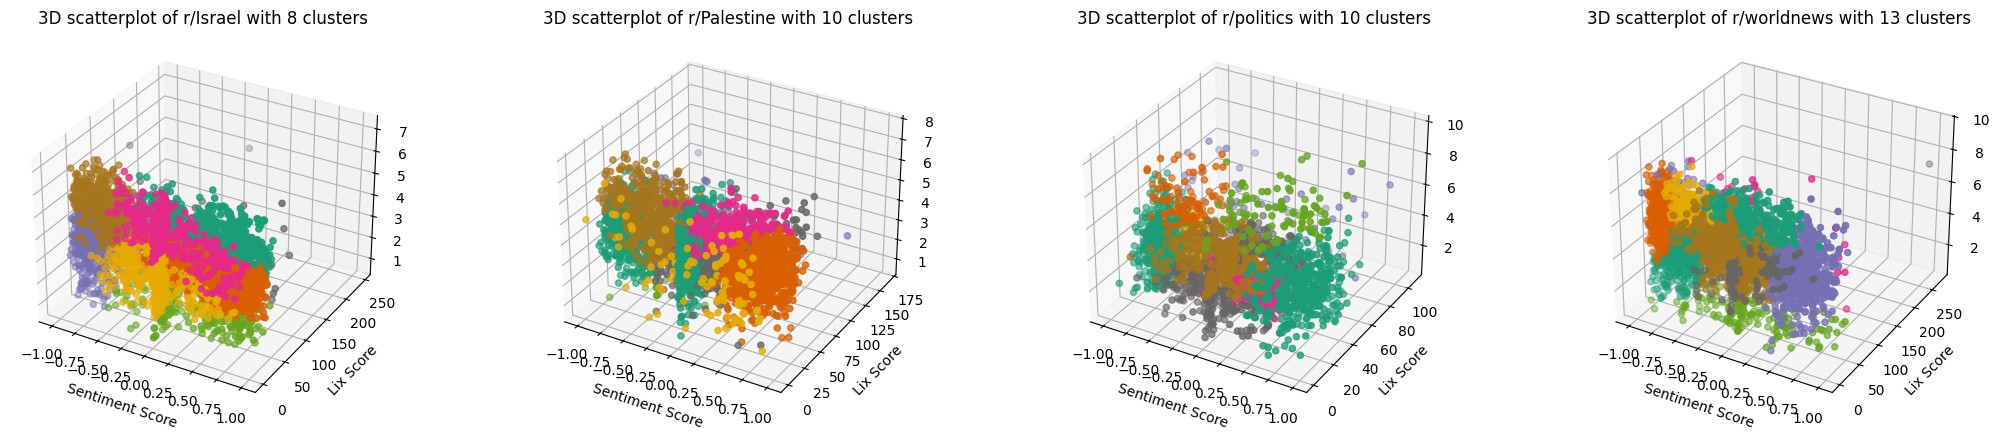

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5), subplot_kw={'projection':'3d'})

for i, (sub, df) in enumerate(dfs.items()):

    n_clusters = df['GMM_cluster'].nunique()

    # #Plot the 3d scatterplot
    axes[i].scatter(df['sentiment_score'], df['lix_score'], df['log_upvotes'], facecolors='none', c = df['GMM_cluster'], cmap = 'Dark2')
    axes[i].set_title(f'3D scatterplot of r/{sub} with {n_clusters} clusters')
    axes[i].set_xlabel('Sentiment Score')
    axes[i].set_ylabel('Lix Score')

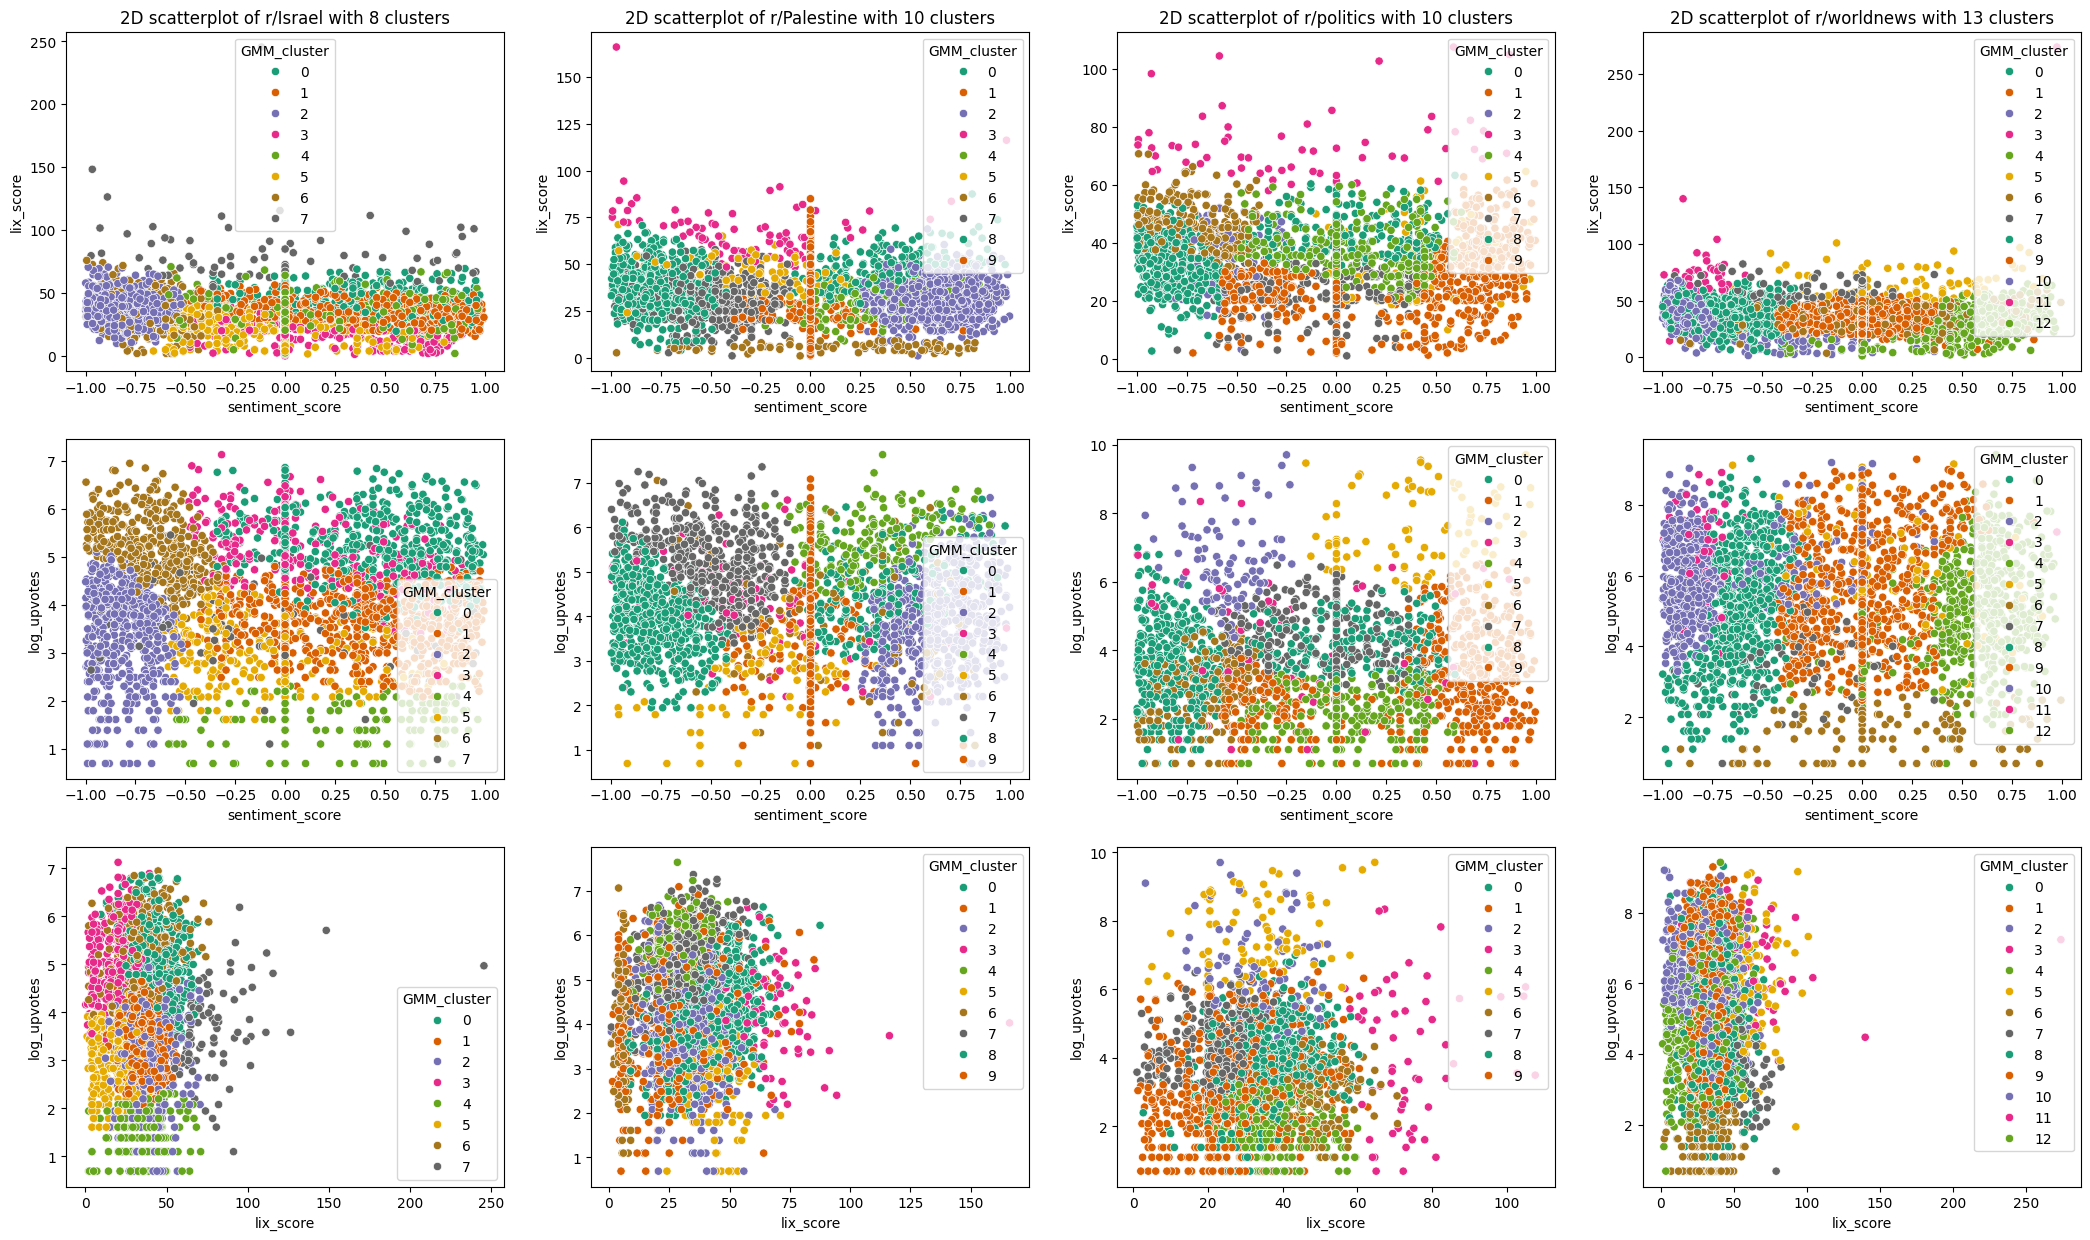

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize=(26, 15))

for i, (sub, df) in enumerate(dfs.items()):
    n_clusters = df['GMM_cluster'].nunique()

    # #Plot the 2d scatterplots
    sns.scatterplot(ax = axes[0, i], data=df, x="sentiment_score", y="lix_score", hue = 'GMM_cluster', palette='Dark2')
    sns.scatterplot(ax = axes[1, i], data=df, x="sentiment_score", y="log_upvotes", hue = 'GMM_cluster', palette='Dark2')
    sns.scatterplot(ax = axes[2, i], data=df, x="lix_score", y="log_upvotes", hue = 'GMM_cluster', palette='Dark2')
    axes[0, i].set_title(f'2D scatterplot of r/{sub} with {n_clusters} clusters')